In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# define base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



611


In [3]:

# creat dataframe with city names and empty columns to hold weather data
cities_df = pd.DataFrame(cities, columns=['City'])

cities_df['Cloudiness'] = ''
cities_df['Country'] = ''
cities_df['Date'] = ''
cities_df['Humidity'] = ''
cities_df['Lat'] = ''
cities_df['Lng'] = ''
cities_df['Max Temp'] = ''
cities_df['Wind Speed'] = ''

In [4]:

# Build api query url using API key as variable
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# iterate through the cities df
for index, row in cities_df.iterrows():

    city = row['City']
    response = requests.get(query_url + city).json()
    print(f"Processing Record {index} | {city}")
    
    try:
        cities_df.loc[index, "Cloudiness"]=response["clouds"]['all']
        cities_df.loc[index, "Country"]=response['sys']['country']
        cities_df.loc[index, "Date"]=response['dt']
        cities_df.loc[index, "Max Temp"]=response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed']=response['wind']['speed']
        cities_df.loc[index, "Humidity"]=response['main']['humidity']
        cities_df.loc[index, "Lat"]=response['coord']['lat']
        cities_df.loc[index, "Lng"]=response['coord']['lon']
        
    except (KeyError, IndexError):
        print("City not found... skipping.")   


Processing Record 0 | puerto ayora
Processing Record 1 | hermanus
Processing Record 2 | rikitea
Processing Record 3 | port-gentil
Processing Record 4 | new norfolk
Processing Record 5 | lodeynoye pole
Processing Record 6 | belushya guba
City not found... skipping.
Processing Record 7 | coahuayana
Processing Record 8 | salalah
Processing Record 9 | verkhnevilyuysk
Processing Record 10 | esperance
Processing Record 11 | kaparellion
Processing Record 12 | farafangana
Processing Record 13 | talnakh
Processing Record 14 | ouegoa
Processing Record 15 | provideniya
Processing Record 16 | mataura
Processing Record 17 | albany
Processing Record 18 | fort nelson
Processing Record 19 | thompson
Processing Record 20 | waddan
Processing Record 21 | maldonado
Processing Record 22 | port alfred
Processing Record 23 | ushuaia
Processing Record 24 | puerto quijarro
Processing Record 25 | burica
City not found... skipping.
Processing Record 26 | severo-kurilsk
Processing Record 27 | narsaq
Processing Re

Processing Record 234 | wamba
Processing Record 235 | raisen
Processing Record 236 | kindu
Processing Record 237 | cayenne
Processing Record 238 | inhambane
Processing Record 239 | mehamn
Processing Record 240 | sinop
Processing Record 241 | charters towers
Processing Record 242 | mys shmidta
City not found... skipping.
Processing Record 243 | yantal
Processing Record 244 | oktyabrskiy
Processing Record 245 | kalmunai
Processing Record 246 | baykit
Processing Record 247 | te anau
Processing Record 248 | faya
Processing Record 249 | norman wells
Processing Record 250 | changli
Processing Record 251 | kaitangata
Processing Record 252 | saldanha
Processing Record 253 | dudinka
Processing Record 254 | leshukonskoye
Processing Record 255 | srednekolymsk
Processing Record 256 | rurrenabaque
Processing Record 257 | ulaanbaatar
Processing Record 258 | sisimiut
Processing Record 259 | high level
Processing Record 260 | port blair
Processing Record 261 | geraldton
Processing Record 262 | yumen
P

Processing Record 469 | carutapera
Processing Record 470 | lavrentiya
Processing Record 471 | chirilagua
Processing Record 472 | leningradskiy
Processing Record 473 | westport
Processing Record 474 | new bern
Processing Record 475 | byron bay
Processing Record 476 | loei
Processing Record 477 | kropotkin
Processing Record 478 | mercedes
Processing Record 479 | belyy yar
Processing Record 480 | gorom-gorom
Processing Record 481 | ilhabela
Processing Record 482 | cidreira
Processing Record 483 | eyl
Processing Record 484 | standerton
Processing Record 485 | muhos
Processing Record 486 | rawannawi
City not found... skipping.
Processing Record 487 | nalut
Processing Record 488 | yashan
Processing Record 489 | grand river south east
City not found... skipping.
Processing Record 490 | ipixuna
Processing Record 491 | kendari
Processing Record 492 | berlevag
Processing Record 493 | mgandu
Processing Record 494 | sangar
Processing Record 495 | ormond beach
Processing Record 496 | isangel
Proces

In [20]:
# drop empty/NaN values
cities_df.replace('', np.nan, inplace=True)
clean_cities_df = cities_df.dropna(axis=0, how='any')

# export df to csv
clean_cities_df.to_csv('output/WeatherPy.csv')

clean_cities_df.count()


City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [6]:
clean_cities_df.head(10)


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,75.0,EC,1.587169e+09,88.0,-0.74,-90.35,78.80,6.55
1,hermanus,99.0,ZA,1.587169e+09,86.0,-34.42,19.23,57.99,5.99
2,rikitea,1.0,PF,1.587169e+09,63.0,-23.12,-134.97,77.32,0.96
3,port-gentil,20.0,GA,1.587169e+09,94.0,-0.72,8.78,78.80,6.93
4,new norfolk,58.0,AU,1.587169e+09,79.0,-42.78,147.06,55.99,3.00
5,lodeynoye pole,55.0,RU,1.587169e+09,97.0,60.73,33.55,30.85,6.15
7,coahuayana,20.0,MX,1.587169e+09,35.0,18.73,-103.68,87.80,11.41
8,salalah,20.0,OM,1.587169e+09,78.0,17.02,54.09,80.60,3.36
9,verkhnevilyuysk,42.0,RU,1.587169e+09,89.0,63.45,120.32,9.99,6.64
10,esperance,46.0,AU,1.587169e+09,72.0,-33.87,121.90,59.00,16.11


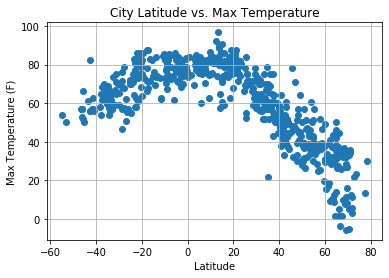

In [7]:
# Build a scatter plot for each data type
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/TemperatureInWorldCities.png")

# Show plot
plt.show()


Analysis:
Max temperature peaks between latitudes 0 and 20 because this is the equator


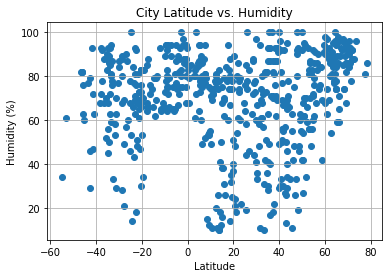

In [8]:
# Build a scatter plot for each data type
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/HumidityInWorldCities.png")

# Show plot
plt.show()

the humidity percentage seems to have minimal correlation to latitude. There may be a slight clustering of 
100% humidity near the south pole due to decreasing saturation vapor pressure.

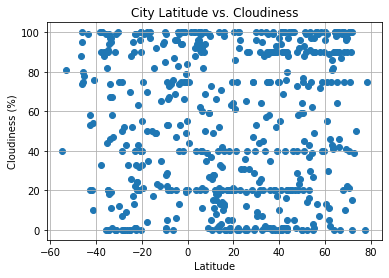

In [10]:
# Build a scatter plot for each data type
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/CloudinessInWorldCities.png")

# Show plot
plt.show()

no discernible correlation between cloud cover and latitude

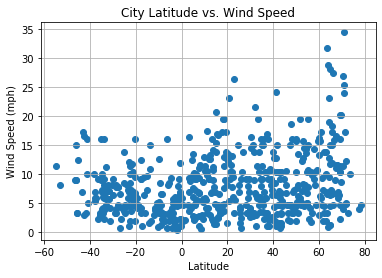

In [9]:
# Build a scatter plot for each data type
plt.scatter(clean_cities_df["Lat"], clean_cities_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [11]:
northern_hemi = clean_cities_df.loc[clean_cities_df["Lat"]>0]
southern_hemi = clean_cities_df.loc[clean_cities_df["Lat"]<0]

northern_hemi.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
5,lodeynoye pole,55.0,RU,1.587169e+09,97.0,60.73,33.55,30.85,6.15
7,coahuayana,20.0,MX,1.587169e+09,35.0,18.73,-103.68,87.80,11.41
8,salalah,20.0,OM,1.587169e+09,78.0,17.02,54.09,80.60,3.36
9,verkhnevilyuysk,42.0,RU,1.587169e+09,89.0,63.45,120.32,9.99,6.64
11,kaparellion,20.0,GR,1.587169e+09,76.0,38.23,23.22,53.01,2.10


The r-squared is: 0.8011879598483115


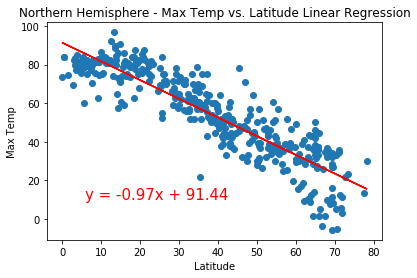

In [12]:
# Print out the r-squared value along with the plot.
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/NHemi_MaxTemp.png")
plt.show()

The regression shows a strong correlation between a decrease in max temperature and distance from the equator

The r-squared is: 0.4847545059738239


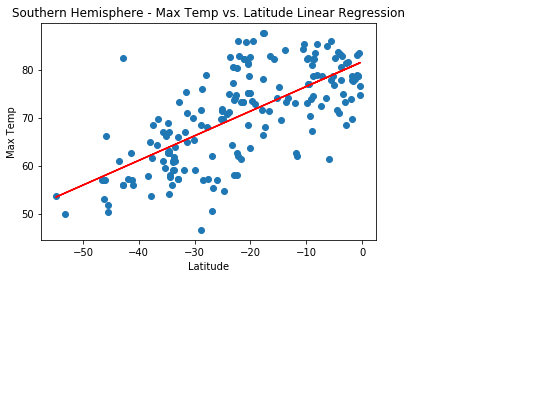

In [13]:
# Print out the r-squared value along with the plot.
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/SHemi_MaxTemp.png")
plt.show()

The regression shows a strong correlation between a decrease in max temperature and distance from the equator

The r-squared is: 0.07609311355934381


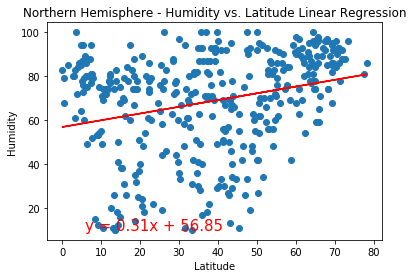

In [14]:
# Print out the r-squared value along with the plot.
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/NHemi_Humidity.png")
plt.show()

The r-squared value indicates a weak correlation between humidity and latitude

The r-squared is: 0.07155451554869575


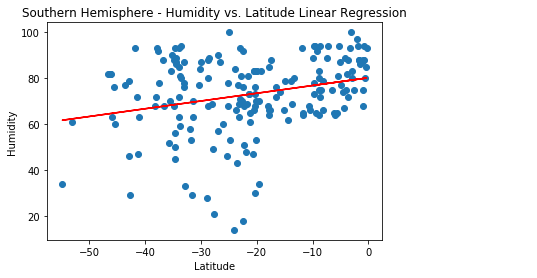

In [15]:
# Print out the r-squared value along with the plot.
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/SHemi_Humidity.png")
plt.show()

The r-squared value indicates a weak correlation between humidity and latitude

The r-squared is: 0.03755540499368214


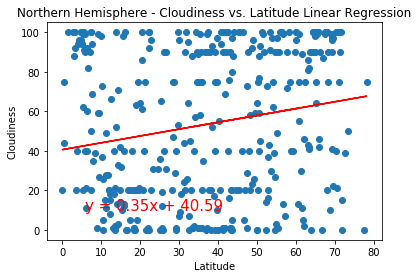

In [16]:
# Print out the r-squared value along with the plot.
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/NHemi_Clouds.png")
plt.show()

The r-squared is: 0.0012212098348645957


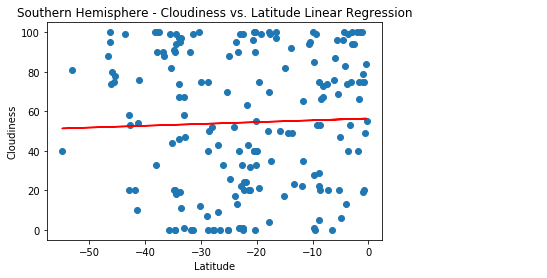

In [17]:
# Print out the r-squared value along with the plot.
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/SHemi_Clouds.png")
plt.show()

The r-squared is: 0.03128622981376906


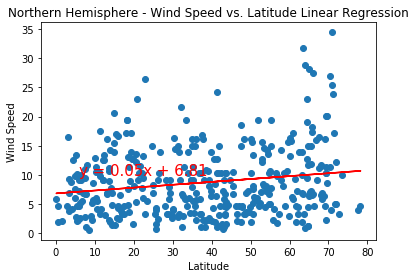

In [18]:
# Print out the r-squared value along with the plot.
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/NHemi_WindSpeed.png")
plt.show()

The r-squared is: 0.10026768534903112


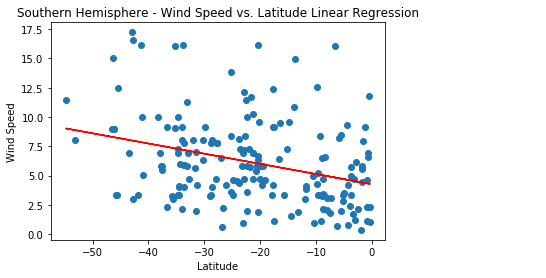

In [19]:
# Print out the r-squared value along with the plot.
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("output/SHemi_WindSpeed.png")
plt.show()